In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import model_selection
from sklearn import decomposition
from sklearn import pipeline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/test.csv
/kaggle/input/mobile-price-classification/train.csv


In [2]:
data = pd.read_csv("input/train.csv")
data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

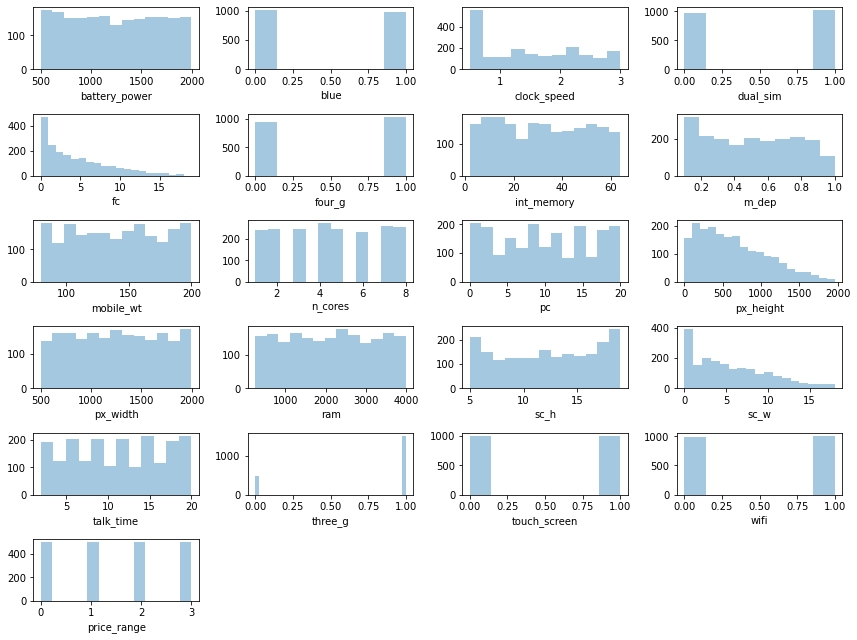

In [4]:
fig = plt.figure(figsize = (12,10))
for index, col in enumerate(data):
    plt.subplot(7,4,index+1)
    sns.distplot(data.loc[:,col],kde =False)
fig.tight_layout(pad=1.0)

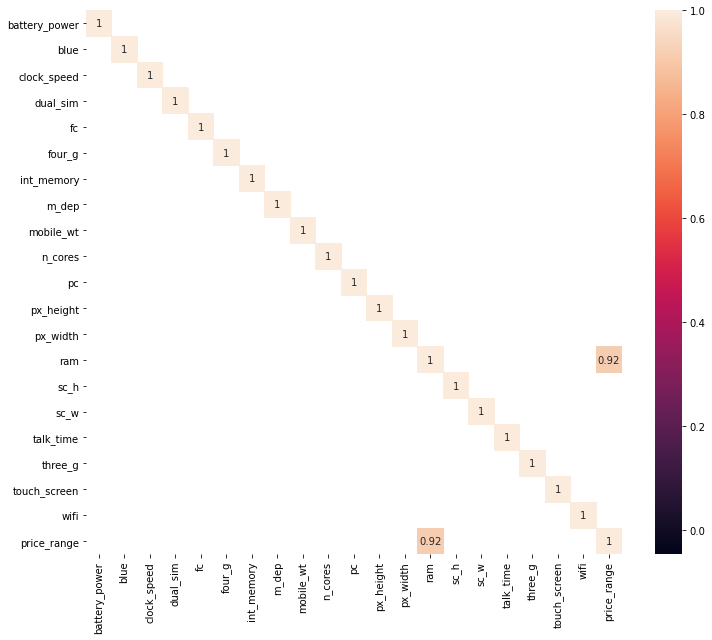

In [5]:
fig = plt.figure(figsize =(12,10))
corr = data.corr()
sns.heatmap(corr, mask = corr<0.8,annot = True)
plt.show()

In [6]:
X = data.iloc[:,:-1].values
X

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [7]:
y = data['price_range'].values
y

array([1, 2, 2, ..., 3, 0, 3])

In [8]:
data['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [9]:
sc = StandardScaler()
X1 = sc.fit_transform(X)
X1

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [10]:
classifier = ensemble.RandomForestClassifier()
param_dist = {
    "n_estimators" : np.arange(100,1500,200),
    "max_depth" : np.arange(1,20),
    "criterion" : ["gini","entropy"]
}

model = model_selection.RandomizedSearchCV(
        estimator = classifier,
        param_distributions=param_dist,
        n_iter =10,
        scoring = 'accuracy',
        n_jobs = 1,
        cv = 4
)

model.fit(X1,y)
print(model.best_score_)
print(model.best_estimator_.get_params())

0.888
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 900, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [11]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
param_dist = {
    "n_estimators" : np.arange(100,1500,200),
    "max_depth" : np.arange(1,20),
}

model1 = model_selection.RandomizedSearchCV(
        estimator = xgb,
        param_distributions=param_dist,
        n_iter =10,
        scoring = 'accuracy',
        n_jobs = 1,
        cv = 4
)

model1.fit(X1,y)
print(model1.best_score_)
print(model1.best_estimator_.get_params())

0.929
{'objective': 'multi:softprob', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 1, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 900, 'n_jobs': 0, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': None, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [12]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
param_dist = {
    "n_estimators" : np.arange(100,1500,200),
    "max_depth" : np.arange(1,20),
}

model1 = model_selection.RandomizedSearchCV(
        estimator = xgb,
        param_distributions=param_dist,
        n_iter =10,
        scoring = 'precision_macro',
        n_jobs = 1,
        cv = 4
)

model1.fit(X1,y)
print(model1.best_score_)
print(model1.best_estimator_.get_params())

0.9318927919348204
{'objective': 'multi:softprob', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 1, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 700, 'n_jobs': 0, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': None, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}
